In [2]:
import numpy as np
import matplotlib.pyplot as plt

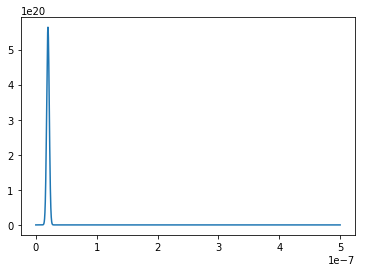

In [165]:
params = {
    'FWHM':5e-9, #ns
    'FA': 0.41,
    'd':1e-5 #cm-2
}

I0 = 3e12

t0 = 20e-9
dt = .1e-9
t = np.arange(0,500e-9,dt)

def calc_pow(t,I0,params):
    sig = params['FWHM']/(2*np.sqrt(2*np.log(2)))
    p0 = (I0/(sig*np.sqrt(2*np.pi)))
    power = p0*np.exp(-((t-t0)**2)/(2*(sig**2)))
    return power

power = calc_pow(t,I0,params)
dng = (FA/d)*power

plt.plot(t,power)

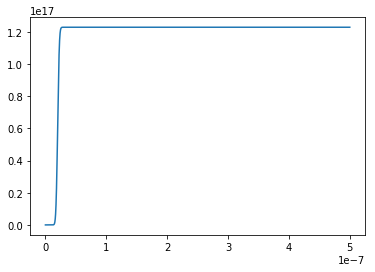

In [166]:
n0 = np.zeros(len(dng))

for i in range(len(power)):
    n0[i] = np.trapz(dng[:i], t[:i])
    
plt.plot(t,n0)

In [157]:
def dnr(n,k1,k2):
    return -k1*n - k2*n**2

(10000000000000.0, 1e+20)

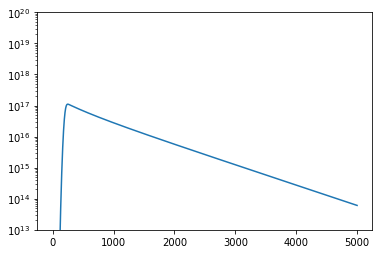

In [161]:
k1 = 1.5e7
k2 = 6e-11 

def calc_n(dng,t,k1,k2):
    dt = t[1] - t[0]
    n = np.zeros(1)
    for i in range(1,len(t)):
        dng_t = dng[:i-1]
        dnr_t = dnr(n[:i-1],k1,k2)
        n = np.append(n,np.trapz((dng_t + dnr_t)*dt))
    return n

n = calc_n(dng,t,k1,k2)

plt.plot(n)
plt.yscale('log')
plt.ylim(1e13,1e20)

In [188]:
fluences = np.logspace(10,16, num=50)
# n_arr = np.empty(shape = (len(t),len(fluences)))
n_max = np.zeros(len(fluences))
n_0max = np.zeros(len(fluences))

for i, fluence in enumerate(fluences):
    power = calc_pow(t,fluence,params)
    dng = (FA/d)*power
    n = calc_n(dng,t,k1,k2)
    #n_arr[i] = n
    n_max[i] = n.max()
    n_0max[i] = np.trapz(dng,t)
    


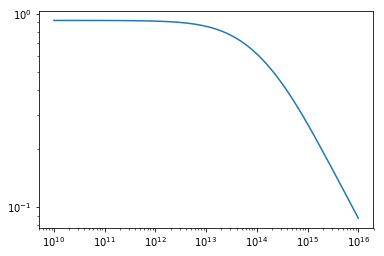

In [189]:
plt.plot(fluences, n_max/n_0max)
plt.xscale('log')
plt.yscale('log')